In [1]:
import os
import networkx as nx
import numpy as np
import json
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
from scipy.stats import powerlaw

In [275]:
reddit_dir = 'E:\Datasets\April_2017_Reddit'
file_name = 'subreddits_sizes.json'

reddit_dir = ''
file_name = 'comm_sizes.json'
file_path = os.path.join(reddit_dir, file_name)

In [276]:
with open(file_path, 'r', encoding='utf8') as file:
    subreddits_sizes = json.load(file)

In [5]:
sr = [it for it in sorted(subreddits_sizes.items(), key=lambda item: item[1], reverse=True)]


In [278]:
len(subreddits_sizes)

7341

In [284]:
remove_last = 1
sample = min(len(subreddits_sizes), 10000)
sorted_sizes = np.array(sorted(subreddits_sizes.values()))#[:-remove_last])
sorted_sizes = np.sort(np.random.choice(sorted_sizes, sample, replace=False))

c:\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


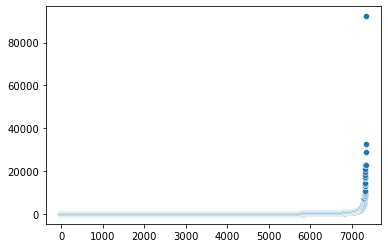

In [286]:
sns.scatterplot(range(1, len(sorted_sizes) + 1),sorted_sizes)

In [287]:
X = np.log(range(1, len(sorted_sizes) + 1))

In [288]:
Y = np.log(sorted_sizes)

c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [289]:
lna = np.polyfit(X, Y, deg=2)
lna

array([nan, nan, nan])

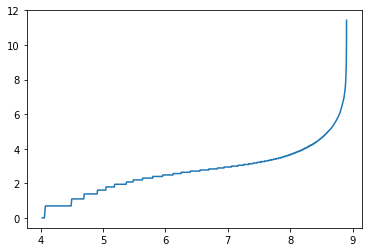

In [290]:
plt.plot(X, Y)

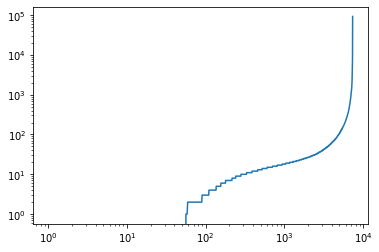

In [291]:
plt.loglog(range(1, len(sorted_sizes) + 1),sorted_sizes)

c:\python36\lib\site-packages\seaborn\_core.py:1038: RuntimeWarning: divide by zero encountered in log10
  comp_var = np.log10(comp_var)


ValueError: autodetected range of [-inf, 4.965215816543491] is not finite

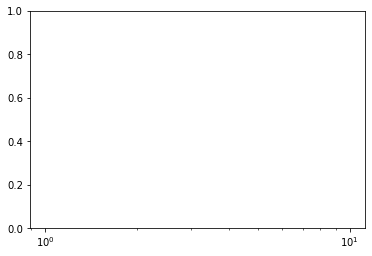

In [292]:
sns.histplot(sorted_sizes, log_scale=True)

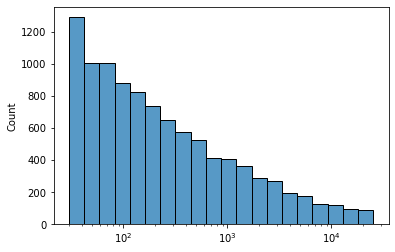

In [213]:
sns.histplot(sorted_sizes, log_scale=True, bins='doane')

In [214]:
def compute_alpha(X):
    return 1 + len(X) / np.sum(np.log(X / X.min()))

In [217]:
alpha = compute_alpha(sorted_sizes)
alpha

1.4866216598059974

In [134]:
def _make_bins(X, a):
    i = 0
    bin_boundaries = [X.min()]
    bin_ranges = []
    while bin_boundaries[-1] + np.power(a, i+1) < X.max():
        bin_boundaries.append(bin_boundaries[-1] + np.power(a, i+1))
        bin_ranges.append(np.power(a, i+1))
        i+=1
    bin_boundaries.append(bin_boundaries[-1] + np.power(a, i+1))
    bin_ranges.append(np.power(a, i+1))
    return bin_boundaries, bin_ranges

In [135]:
def log_bin(X, a):
    bin_boundaries, bin_range = _make_bins(X, a)
    bin_num_samples = []
    for b in range(len(bin_boundaries) - 1):
        indices = np.intersect1d(np.where(bin_boundaries[b] <= X),  np.where(X < bin_boundaries[b+1]))
        bin_num_samples.append(indices.shape[0])
    return bin_boundaries, bin_ranges, bin_num_samples

In [197]:
bin_boundaries, bin_ranges, bin_num_samples = log_bin(np.array(sorted_sizes), 1.3)

In [244]:
pwl = powerlaw(alpha)

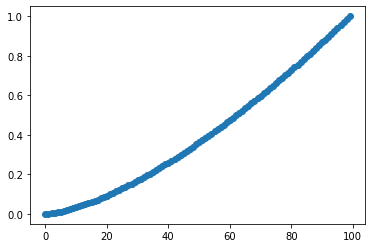

In [245]:
plt.scatter(range(100), pwl.cdf(np.linspace(0, 1, 100)))

In [254]:
def power_law_dist1(X, alpha):
    print(X.min())
    return ((alpha-1) / 30) * (np.power(X / 30, -alpha))

In [255]:
power_law_dist1(np.array([1,2,3]), alpha)

1


array([2.54677532, 0.90880963, 0.49738403])

In [253]:
sorted_sizes

array([   30,    30,    30, ..., 24828, 25082, 25329])